In [19]:
# Import the needed libraries and setting up the directory.
import pandas as pd
import numpy as np
import nltk
from pathlib import Path
import os
from typing import Union
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import re



In [20]:
# Downloading the NLTK libraries that will be used to process the Reddit posts
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\brobi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brobi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\brobi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
df = pd.read_csv (r"C:\Users\brobi\OneDrive\Desktop\Brian\BrianProjects\data_lkyprk\data.csv")
print(df.columns)
print(df.loc[5])

Index(['  title', 'permalink', 'selftext', 'upvote_ratio', 'url', 'votes'], dtype='object')
  title                            City Council Agenda (3-9-2021)
permalink       /r/SantaMonica/comments/m0wqqn/city_council_ag...
selftext        You can watch a live stream of the meeting on ...
upvote_ratio                                                 0.89
url             https://www.reddit.com/r/SantaMonica/comments/...
votes                                                        20.0
Name: 5, dtype: object


In [22]:
df = df.dropna()
print(df['selftext'])

1      Per Councilman Huizar:\n\nConsistent with exte...
5      You can watch a live stream of the meeting on ...
6      As we all know, currently there's been a housi...
7      Your 12-minute Friday report in 3091 words.\n\...
8      >[*"Why is San Francisco the way that it is?"*...
                             ...                        
218    I'd like to have a discussion regarding how yo...
219    Welcome to The Standings Game!  \n  \nThe Stan...
220    Welcome to The Standings Game!  \n  \nThe Stan...
221    # All headline links are at loki's revenge blo...
222    Welcome to The Standings Game!  \n  \nThe Stan...
Name: selftext, Length: 219, dtype: object


In [23]:
# Because I want to filter out the terms used in the Reddit API search and urls 
# (because terms like 'www' and 'http' were some of the topranking terms)


text = df['selftext'].reset_index(drop=True)
print(type(text))
text_split = []
for i in text:
    text_split.append(i.split())
print(type(text_split ))
#print(text_split)    
for i in text_split:
    for word in i:
        word.lower()
#print(text_split)
#x1 = text_split[1]
#print(type(x1))
#x1_lower = [x.lower() for x in x1]       
#print(x1_lower)

#search_words = ['LosAngeles','parking','all','Los Angeles parking','Los Angeles','regulation']
#text_removed_sw = []
#for word in x1_lower:
    #if word not in search_words:
        #text_removed_sw.append(word)
#print(text_removed_sw)
#text_final = []
#for word in text_removed_sw:
    #if word not in stop_words:
        #text_final.append(word)
#print(text_final)

<class 'pandas.core.series.Series'>
<class 'list'>


In [24]:
#Checking to make sure I hadn't lost any rows.
print(len(text_split))

219


In [25]:
#Putting all terms in lowercase
all_lower = []
for i in range(len(text_split)):
    x1 = text_split[i]
    x1_lower = [x.lower() for x in x1]
    all_lower.append(x1_lower)       
#print(all_lower)

In [26]:
#Filtering out searchwords because these will be present in all the posts.
search_words = ['LosAngeles','parking','all','Los Angeles parking','Los Angeles','regulation','los','Los','Angeles','angeles','www', 'http', 'https', 'com', 'would', 'mr']
all_lower_removed_sw = []
for i in range(len(all_lower)):
    tmp_lst = []
    x2 = all_lower[i]
    for word in x2:
        if word not in search_words:
            tmp_lst.append(word)
    all_lower_removed_sw.append(tmp_lst)
#print(all_lower_removed_sw)
 
final_text = []
for i in range(len(all_lower_removed_sw)):
    tmp_lst = []
    x3 = all_lower_removed_sw[i]
    for word in x3:
        if word not in stop_words:
            tmp_lst.append(word)
    final_text.append(tmp_lst)
print(type(final_text))
final_str = str(final_text)
#print(final_text)
print(type(final_str))


#for word in x1_lower:
    #if word not in search_words:
        #text_removed_sw.append(word)
#print(text_removed_sw)
#text_final = []
#for word in text_removed_sw:
    #if word not in stop_words:
        #text_final.append(word)
#print(text_final)


<class 'list'>
<class 'str'>


In [27]:
print(final_text[0])

['per', 'councilman', 'huizar:', 'consistent', 'extended', '"stay', 'home"', 'orders,', 'certain', 'regulations', 'remain', 'relaxed', 'least', 'june', '1,', '2020.', 'regulations', 'relaxed', 'time,', 'others', 'remain', 'enforced.', 'ladot', 'relaxed', 'enforcement', 'following', 'categories:', '-residential', 'street', 'sweeping', '-expired', 'registration', 'vehicle', '-peak/rush', 'hour', 'gridlock', 'zone', 'restrictions', '-no', 'ticket/tow', 'abandoned', 'vehicles', 'overnight', '-vehicles', 'displaying', 'recently', 'expired', 'permits', 'within', 'preferential', 'districts', 'two-week', 'grace', 'period', 'following', 'expiration', 'renew', 'addition:', '-no', 'fine', 'increases', 'june', '1', '-extended', 'grace', 'period', 'people', 'dropping', 'picking', '-immediate', 'extensions', 'deadlines', 'payments', 'june', '1', '-ladot', 'supply', 'temporary,', 'print-at-home', 'permit', 'residents', 'within', 'preferential', 'district', 'renewed', 'permit', 'receive', 'new', 'hang

In [28]:
#Using regex to create a list of all URLs
final_text_string = str(final_text)
matches = re.findall(r"\w+://\w+\.\w+\.\w+/?[\w\.\?=#]*", final_text_string)
#print(matches)

In [29]:
#Using the list to filter out all URLs from the text
final_final = []
for i in range(len(final_text)):
    tmp_lst = []
    x3 = final_text[i]
    for word in x3:
        if word not in matches:
            tmp_lst.append(word)
    final_final.append(tmp_lst)

In [30]:
#Now that the text was split into individual terms, made uniform by changing to lowercase, and filtering out the search terms and URLs, 
#we now join the lists of words back together to be able to do tf-idf analysis which will hopefully identify the most important themes in 
#the posts. This is not just counting term frequency, but weighing term frequency to try to identify the most influential terms in the texts.
inpt = [" ".join(x) for x in final_final]
tfIdfTransformer = TfidfTransformer(use_idf = True)
countVectorizer = CountVectorizer()
wordCount = countVectorizer.fit_transform(inpt)
newTfIdf = tfIdfTransformer.fit_transform(wordCount)


In [31]:
#Creating a new dataframe with the terms and the tf-idf score. I will then visualize the top 25 with both pie and bar charts to give a 
#sense of the spread.

sim_df = pd.DataFrame(newTfIdf[0].T.todense(), index = countVectorizer.get_feature_names(), columns = ["TF-IDF"])
sim_df = sim_df.sort_values('TF-IDF', ascending = False)
print(sim_df.head())
sim_df_small = sim_df.iloc[:25]

                TF-IDF
preferential  0.316292
permit        0.272659
expired       0.239373
relaxed       0.216876
grace         0.185221


array([<AxesSubplot:ylabel='TF-IDF'>], dtype=object)

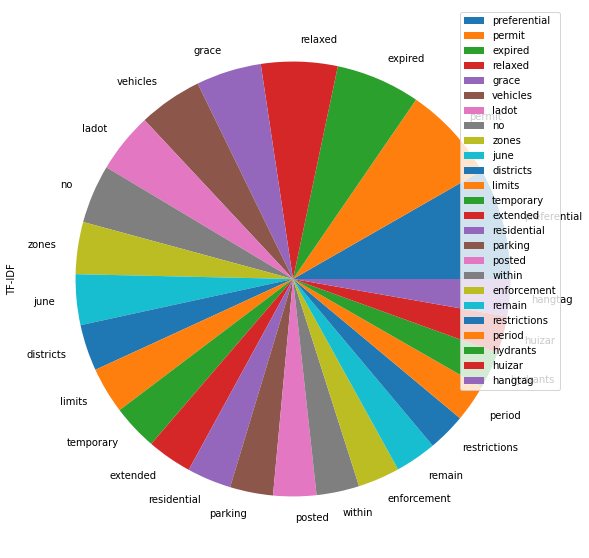

In [32]:
sim_df_small.plot(kind = 'pie', subplots=True, figsize=(10,10))

<AxesSubplot:>

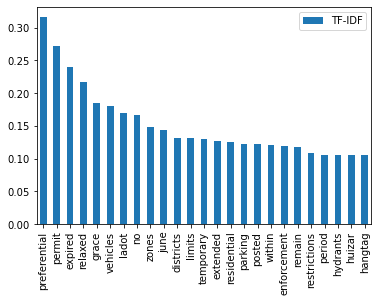

In [33]:
#We can see an elbow starting around the sixth term and that the first four (preferential, permit, expired, relaxed) are probably worth exploringl.
sim_df_small.plot(kind = 'bar')

In [34]:
# Extracting the keywords from the dataset.
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)

tfidf.fit(inpt)
text = tfidf.transform(inpt)

# Settiong the clusters for the next process.
clusters = MiniBatchKMeans(n_clusters = 14, init_size = 1024, batch_size = 2048, random_state = 20).fit_predict(text)

In [35]:
def get_top_keywords(inpt, clusters, labels, n_terms):
    la_df = pd.DataFrame(inpt.todense()).groupby(clusters).mean()
    
    for i,r in la_df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms : ]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 20)


Cluster 0
jazz,location,park,320,july,tournament,event,14th,dr,info,com,10,21,ave,maple,30,omaha,lounge,st,pm

Cluster 1
covid,parliament,yerevan,pashinyan,azeri,factor,armenian,news,artsakh,com,www,nbsp,html,article,arm,armenpress,armtimes,https,armenia,hy

Cluster 2
berth,note,importance,matchup,effect,actual,game,result,usl,colorado,springs,results,draw,average,playoff,ideal,games,win,standings,fc

Cluster 3
rent,health,october,california,http,la,racing,city,19,mexico,covid,imgur,horse,www,losangeles,points,reddit,com,https,comments

Cluster 4
articles,restrictive,crash,anybody,driverless,somebody,testing,03,com,autonomous,parked,governor,car,cars,street,arizona,driving,self,suspends,uber

Cluster 5
cases,nail,salons,resume,shopping,nightclubs,counties,waiting,dining,county,businesses,plans,gyms,reopen,postponed,gov,phase,indoor,bars,reopening

Cluster 6
election,budget,chilling,ordinance,passes,stores,ballot,laws,measure,bags,statewide,money,law,42,effect,ca,court,fly,state,prop



In [36]:
for i in matches:
    stop_words.add(i)
for i in search_words:
    stop_words.add(i)

#print(stop_words)

In [37]:
def create_grams(df, gram: str = 'bi') -> list: 

    #combine title and text from df
    df['title_selftext'] = df['  title'] + df['selftext']

    #preprocess text (lowercase etc)
    df['title_selftext'] = df['title_selftext'].apply(lambda x: x.lower())

    #tokenize words
    df['tokens'] = df.title_selftext.apply(lambda x: nltk.RegexpTokenizer(r'\w+').tokenize(x))
    #remove stopwords and lemmatize with WordNetLemmatizer
    wnl = WordNetLemmatizer()
    df['tokens'] = df['tokens'].apply(lambda x: [wnl.lemmatize(w) for w in x if not w in stop_words])

    #bigram, trigram, or error
    if gram =='bi':
        df['grams'] = df['tokens'].apply(nltk.bigrams)
    elif gram =='tri':
        df['grams'] = df['tokens'].apply(nltk.trigrams)
    else:
        raise NameError('Only bi or tri allowed')

    # Return combined list of bi-grams.
    return [' '.join(item) for sublist in df.grams for item in sublist]

In [38]:
#generate bi-grams
bi_gram = []
x = bi_gram + create_grams(df,'bi')
bi_gram_series = pd.Series(x)

bi_gram_regulation = bi_gram_series[bi_gram_series.str.contains('regulation')].value_counts()
bi_gram_preferential = bi_gram_series[bi_gram_series.str.contains('preferential')].value_counts()

In [39]:
#This is going to print out the totals for all the bi-grams. As you can see, the most frequent bi-grams do not have an apparent usefulness. 
#To try to get at more useful bi-grams, I filter to results containing 'regulation' in order to see what terms are paired with it. 
print(bi_gram_series.value_counts())

new york            360
youtube watch       325
watch v             325
comment comment     324
reddit r            257
                   ... 
korean fried          1
herald arlington      1
hill yeah             1
et switchbacks        1
gathering place       1
Length: 227502, dtype: int64


In [40]:
print(bi_gram_regulation[:10])

zoning regulation     10
safety regulation      8
rule regulation        8
law regulation         7
faa regulation         5
certain regulation     4
regulation relaxed     4
use regulation         4
city regulation        3
2020 regulation        3
dtype: int64


In [43]:
print(bi_gram_preferential)

within preferential      3
preferential district    3
dtype: int64


In [41]:
#generate tri-grams
tri_gram = []
y = tri_gram + create_grams(df,'tri')
tri_gram_series = pd.Series(y)

tri_gram_counts = tri_gram_series[tri_gram_series.str.contains('regulation')].value_counts()
print(tri_gram_counts[:10])

land use regulation             4
regulation currently require    3
actor safety regulation         3
1 2020 regulation               3
2020 regulation relaxed         3
applicable law regulation       3
regulation remain relaxed       3
certain regulation remain       3
regulation relaxed time         3
order certain regulation        3
dtype: int64


In [45]:
#Now that I can see the most commonly used bi and tri-grams given a specific term, I can search the posts and create a new Dataframe
#made up exclusively of posts that contain that bi or tri-gram. Below we have the first result for the posts that contain 'zoning regulation' 
#which was the most used bi-gram containing 'regulation'. 
results = df.loc[df.selftext.str.contains('zoning regulation')].reset_index()
print(results.selftext[2])

We have talked much on this subreddit about why zoning is bad, or even steps to take to abolish zoning, but we also need to look towards what a city without zoning is going to look like. In the United States, we have such a city, and it is one of the most ill-planned cities in America, behind only Los Angeles in its suburban sprawl and car-centric design. That city is Houston.

This post should serve two purposes. The first is that NIMBYs all across the land will offer up Houston as an example as to why zoning is necessary, and why eliminating zoning will not fix the problems with our cities. I hope to provide an easy way to rebut such arguments, by demonstrating that Houston is in fact subject to de facto zoning regulations. The second is to demonstrate the importance of continually fighting for better cities. Despite literally lacking zoning, the policies of Houston’s government have created a city that stands against everything we want in our cities.

**Zoning and Houston**

Zoning 